In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
Sigma = np.array([[2, 1, 1, 1], [1, 2, 1, 1], [1, 1, 2, 1], [1, 1, 1, 2]])
Sigma_sqrt = np.array([[1.309, 0.309, 0.309, 0.309], [0.309, 1.309, 0.309, 0.309], [0.309, 0.309, 1.309, 0.309], [0.309, 0.309, 0.309, 1.309]])

In [144]:
def initialize(N):
    w = np.zeros(N)
    for i in range(len(w)):
        w[i] += np.random.uniform(-0.1, 0.1)
    return w


def train(N, Sigma, epochs, sigma, lr=0.001):
    w = initialize(N)
    w_evolution = []

    for i in range(epochs):
        x = np.random.multivariate_normal([0, 0, 0, 0], Sigma)
        
        V = np.dot(x.T, w)

        dw = lr * V * (x - V * w)

        # print("lr:", lr)
        # print("V:", V)
        # print("x:", x)
        # print("w:", w)

        w += dw
        w_evolution.append(np.copy(w))

    return w, np.array(w_evolution)

In [155]:
np.random.seed(10)
w1, w_evolution1 = train(4, Sigma, 10000)

In [156]:
w1

array([0.49342047, 0.48567298, 0.50528065, 0.51656417])

In [121]:
np.linalg.eig(Sigma)

(array([1., 5., 1., 1.]),
 array([[-0.8660254 , -0.5       , -0.15046386,  0.14339086],
        [ 0.28867513, -0.5       , -0.39043413,  0.65199899],
        [ 0.28867513, -0.5       , -0.31206131, -0.74266874],
        [ 0.28867513, -0.5       ,  0.85295929, -0.0527211 ]]))

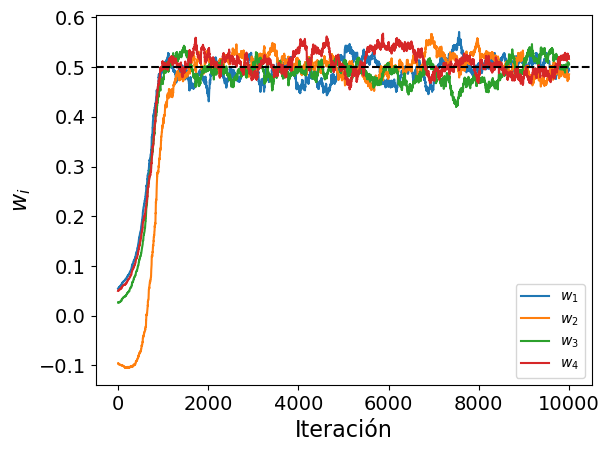

In [159]:
plt.plot(w_evolution1[:, 0], label='$w_1$')
plt.plot(w_evolution1[:, 1], label='$w_2$')
plt.plot(w_evolution1[:, 2], label='$w_3$')
plt.plot(w_evolution1[:, 3], label='$w_4$')

plt.axhline(0.5, linestyle='--', color='black')

plt.xlabel('Iteración', fontsize=16)
plt.ylabel('$w_i$', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.legend()

#plt.savefig('ej1_pesos.png', dpi=300, bbox_inches='tight')

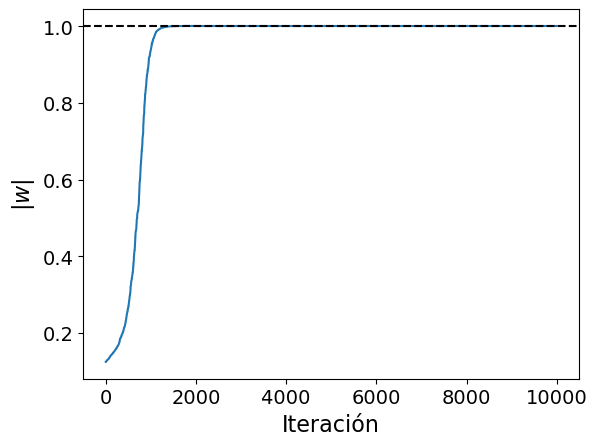

In [166]:
norm_w = [np.linalg.norm(W) for W in w_evolution1]

plt.plot(norm_w)

plt.axhline(1, linestyle='--', color='black')

plt.xlabel('Iteración', fontsize=16)
plt.ylabel('$|w|$', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

#plt.savefig('ej1_norma.png', dpi=300, bbox_inches='tight')